In [1]:
import pandas as pd
import numpy as np

! pip install spacy
import spacy

! pip install nltk
import nltk

In [2]:
df = pd.read_csv("/Users/kaushalpatil/Development/Turkey-Syria Earthquake/Turkey-Syria Earthquake (1).csv")

In [3]:
df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake']
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ..."
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake']
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake']
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3244 non-null   object 
 1   id              3244 non-null   float64
 2   rawContent      3244 non-null   object 
 3   lang            3244 non-null   object 
 4   username        3244 non-null   object 
 5   likeCount       3244 non-null   int64  
 6   retweetCount    3244 non-null   int64  
 7   followersCount  3244 non-null   int64  
 8   verified        3244 non-null   bool   
 9   hashtags        3244 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 231.4+ KB


In [5]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an', 'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once', 'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such', 't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom', 'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre", "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['cleanedContent'] = df['rawContent'].apply(lambda text: cleaning_stopwords(text))
df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake'],I read happened prayers #TurkeySyriaEarthquake
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ...",Please donate #Turkey &amp; #Syria Emergency A...
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake'],@theMadridZone @MailSport #TurkeySyriaEarthqua...
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake'],"""We live, cling precisely life would otherwise..."
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake'],Please support fren @AstarDegens frens #Turkey...


In [6]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['cleanedContent']= df['cleanedContent'].apply(lambda x: cleaning_punctuations(x))
df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake'],I read happened prayers TurkeySyriaEarthquake
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ...",Please donate Turkey amp Syria Emergency Apeal...
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake'],theMadridZone MailSport TurkeySyriaEarthquake ...
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake'],We live cling precisely life would otherwise i...
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake'],Please support fren AstarDegens frens TurkeySy...


In [8]:
import re
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['cleanedContent'] = df['cleanedContent'].apply(lambda x: cleaning_URLs(x))
df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake'],I read happened prayers TurkeySyriaEarthquake
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ...",Please donate Turkey amp Syria Emergency Apeal...
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake'],theMadridZone MailSport TurkeySyriaEarthquake ...
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake'],We live cling precisely life would otherwise i...
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake'],Please support fren AstarDegens frens TurkeySy...


In [9]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['cleanedContent'] = df['cleanedContent'].apply(lambda x: cleaning_numbers(x))
df.tail()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent
3239,2023-02-18 12:24:32+00:00,1.626920e+18,More unbelievable rescues in the last 24 hours...,en,NakhatiJ,7,2,282,False,"['TurkeySyriaEarthquake', 'rescuers', 'Turkiye...",More unbelievable rescues last hours Lord giv...
3240,2023-02-18 12:15:11+00:00,1.626920e+18,“The delay in response to the devastating eart...,en,The_NewArab,4,1,154287,True,['TurkeySyriaEarthquake'],“The delay response devastating earthquake lat...
3241,2023-02-18 12:15:11+00:00,1.626920e+18,"Heroism, sorrow, relief emerge from the rubble...",en,The_NewArab,1,0,154287,True,['TurkeySyriaEarthquake'],Heroism sorrow relief emerge rubble Turkey’s e...
3242,2023-02-18 12:03:40+00:00,1.626920e+18,My prays for the all victims \n\n#depremzede #...,en,homosap_nft,1,0,12,False,"['depremzede', 'earthquakeinturkey', 'earthqua...",My prays victims depremzede earthquakeinturkey...
3243,2023-02-18 11:52:47+00:00,1.626910e+18,Oh God such a tragic end \n\n#depremzede #eart...,en,homosap_nft,1,0,12,False,"['depremzede', 'earthquakeinturkey', 'earthqua...",Oh God tragic end depremzede earthquakeinturke...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3244 non-null   object 
 1   id              3244 non-null   float64
 2   rawContent      3244 non-null   object 
 3   lang            3244 non-null   object 
 4   username        3244 non-null   object 
 5   likeCount       3244 non-null   int64  
 6   retweetCount    3244 non-null   int64  
 7   followersCount  3244 non-null   int64  
 8   verified        3244 non-null   bool   
 9   hashtags        3244 non-null   object 
 10  cleanedContent  3244 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 256.7+ KB


In [12]:
import pandas as pd
import re

def clean_text_column(df, column_name='cleanedContent'):
    """
    Clean a specified column in a DataFrame by removing punctuation 
    and converting text to lowercase.

    :param df: Pandas DataFrame containing the text column.
    :param column_name: Name of the column to clean (default is 'cleanedContent').
    :return: DataFrame with cleaned text column.
    """
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    # Regular expression for removing punctuation
    punct_removal_regex = r'[^\w\s]'

    # Removing punctuation and converting text to lowercase
    df[column_name] = df[column_name].apply(lambda x: re.sub(punct_removal_regex, '', str(x)).lower())

    return df

# Example usage
df = clean_text_column(df, 'cleanedContent')


In [13]:
df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake'],i read happened prayers turkeysyriaearthquake
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ...",please donate turkey amp syria emergency apeal...
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake'],themadridzone mailsport turkeysyriaearthquake ...
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake'],we live cling precisely life would otherwise i...
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake'],please support fren astardegens frens turkeysy...


In [15]:
cities = pd.read_csv("worldcities.csv")

In [17]:
def get_cities_from_country(df, country_name):
    filtered_df = df[df['country'] == country_name]
    cities = filtered_df['city'].tolist()
    return cities

turkey_ls = get_cities_from_country(cities, 'Turkey')

In [18]:
turkey_ls.append('turkey')
len(turkey_ls)
turkey_ls[:10]

['Istanbul',
 'Ankara',
 'İzmir',
 'Bursa',
 'Antalya',
 'Konya',
 'Gaziantep',
 'Şanlıurfa',
 'Mersin',
 'Adana']

In [19]:
syria_ls = get_cities_from_country(cities, 'Syria')
syria_ls.append('syria')
len(syria_ls)
syria_ls[:10]

['Aleppo',
 'Damascus',
 'Homs',
 'Latakia',
 'Ḩamāh',
 'Ar Raqqah',
 'Dayr az Zawr',
 'Al Ḩasakah',
 'Al Qāmishlī',
 'Idlib']

In [25]:
def identify_words(df, turkey_ls, syria_ls):
    df['turkey'] = ''
    df['syria'] = ''
    turkey_ls = [word.lower() for word in turkey_ls]
    syria_ls = [word.lower() for word in syria_ls]
    for index, row in df.iterrows():
        content = row['cleanedContent'].lower()  
        df.at[index, 'turkey'] = ', '.join([word for word in turkey_ls if word in content])
        df.at[index, 'syria'] = ', '.join([word for word in syria_ls if word in content])
    return df
updated_df = identify_words(df, turkey_ls, syria_ls)

In [26]:
updated_df.head()

,date,id,rawContent,lang,username,likeCount,retweetCount,followersCount,verified,hashtags,cleanedContent,turkey,syria
0,2023-03-05 13:47:35+00:00,1.632380e+18,I just read it happened again my prayers #Turk...,en,SamariaSam7,0,0,223,False,['TurkeySyriaEarthquake'],i read happened prayers turkeysyriaearthquake,turkey,syria
1,2023-03-05 13:36:20+00:00,1.632370e+18,Please donate to #Turkey &amp; #Syria Emergenc...,en,IslamAndLifeOFC,1,1,130602,False,"['Turkey', 'Syria', 'HumanAppeal', 'charity', ...",please donate turkey amp syria emergency apeal...,turkey,syria
2,2023-03-05 13:33:59+00:00,1.632370e+18,@theMadridZone @MailSport #TurkeySyriaEarthqua...,en,Kumkani_James,0,0,302,False,['TurkeySyriaEarthquake'],themadridzone mailsport turkeysyriaearthquake ...,turkey,syria
3,2023-03-05 13:15:11+00:00,1.632370e+18,"""We live, we cling to the other precisely beca...",en,The_NewArab,3,1,154287,True,['TurkeySyriaEarthquake'],we live cling precisely life would otherwise i...,turkey,syria
4,2023-03-05 13:10:55+00:00,1.632370e+18,Please support our fren @AstarDegens and frens...,en,TheMarsCaptain,0,0,37,False,['TurkeySyriaEarthquake'],please support fren astardegens frens turkeysy...,turkey,syria


In [24]:
updated_df.to_csv("List of cities mentioned.csv")

In [1]:
set(updated_df['turkey'])

NameError: name 'updated_df' is not defined

In [27]:
! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Using cached matplotlib-3.8.2-cp310-cp310-macosx_11_0_arm64.whl (7.5 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.3 MB/s eta 0:00:0000:0100:01m
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl (66 kB)
  Using cached contourpy-1.2.0-cp310-cp310-macosx_11_0_arm64.whl (242 kB)


In [8]:
import pandas as pd
df = pd.read_csv("List of cities mentioned.csv")
ans = list(df['syria'].unique())

In [9]:
ans

['syria',
 'aleppo, syria',
 'idlib, syria',
 'damascus, syria',
 'aleppo, idlib, syria',
 'damascus, idlib, syria']

In [28]:
import wordcloud

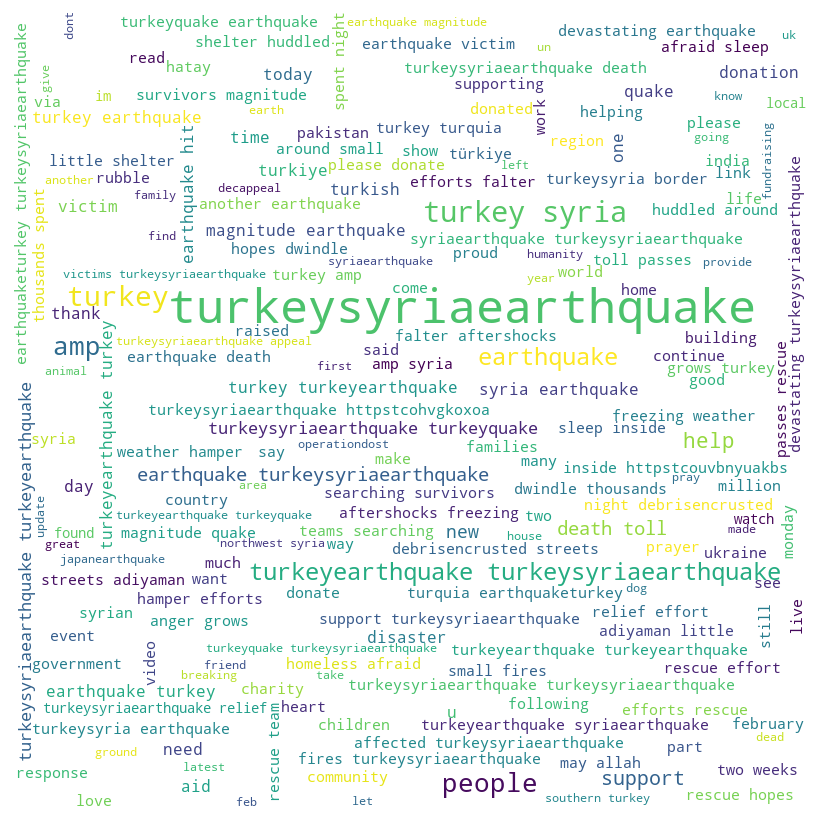

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all text in the column
all_text = ' '.join(updated_df['cleanedContent'])

# Creating the WordCloud object
wordcloud = WordCloud(width = 800, height = 800,  background_color ='white',  min_font_size = 10).generate(all_text)

# Display the generated WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
